# Analysis of Classical Fischer Information of noisy circuits

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pathlib
import numpy as np
from matplotlib import cm
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.5


from queso.io import IO

In [38]:
ns = [2, 3, 4, 5, 6, 7, 8]
ks = [2, 3, 4, 5, 6, 7, 8]

In [39]:
def load_data(io, ns, ks):
    data = {}
    for n in ns:
        _d = {}
        for k in ks:
            fid = io.path.joinpath(f'n={n}_k={k}.pkl')
            if fid.is_file():
                _df = io.load_dataframe(fid.stem)

                # fix datatype issues
                _df["fi"] = _df["fi"].astype('float64')

            else:
                _df = None

            _d[k] = _df
        data[n] = _d


    return data

io = IO(folder=r"noisy_cfi_batch_sweep/cnot_2local_dephased_ansatz/optimization", verbose=False)
data = load_data(io, ns, ks)

In [40]:
for n in ns:
    for k in ks:
        df = data[n][k]
        print(f"n={n}, k={k} | {df['fi'].max() if df is not None else 'NA'}")
# print(data[2][2])
df = data[2][2]
print(df)

n=2, k=2 | 3.999918872462461
n=2, k=3 | 3.9998595848539766
n=2, k=4 | 3.9998349440093226
n=2, k=5 | 3.999881074551447
n=2, k=6 | 3.9997896812222447
n=2, k=7 | 3.9997693295778136
n=2, k=8 | 3.9997823384780644
n=3, k=2 | 8.999727425171852
n=3, k=3 | 8.99923972192558
n=3, k=4 | 8.999447725526876
n=3, k=5 | 8.99945618229469
n=3, k=6 | 8.999172603361473
n=3, k=7 | 8.99905768028098
n=3, k=8 | 8.999014739743203
n=4, k=2 | 9.999718124076699
n=4, k=3 | 15.998798875510662
n=4, k=4 | 15.997394815556635
n=4, k=5 | 15.997959519484272
n=4, k=6 | 15.99776899044955
n=4, k=7 | 15.99750929711897
n=4, k=8 | 15.997245392641373
n=5, k=2 | 15.998903033908746
n=5, k=3 | 24.997485439871163
n=5, k=4 | 24.996639530038927
n=5, k=5 | 24.996535177250315
n=5, k=6 | 24.992702275979042
n=5, k=7 | 24.989559649024216
n=5, k=8 | 24.990608453323567
n=6, k=2 | 16.998813827280504
n=6, k=3 | 35.99548153538715
n=6, k=4 | 35.994631578503096
n=6, k=5 | 35.9940728787071
n=6, k=6 | 35.99175813330161
n=6, k=7 | 35.99226931910763


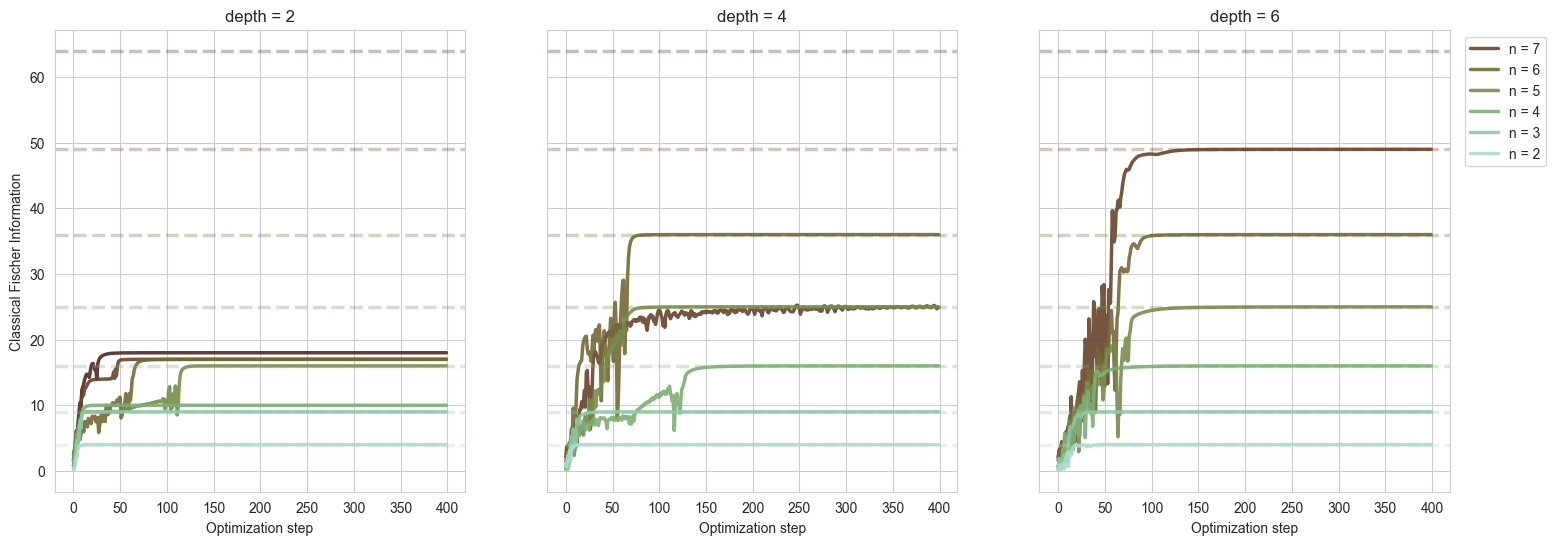

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[18, 6], sharey=True)
colors = sns.cubehelix_palette(start=0.5, rot=0.75, dark=0.2, light=.8, as_cmap=True)
norm = lambda x: (x - np.min(ns))/(np.max(ns) - np.min(ns))

gammas = sorted(df["gamma"].unique())
gamma = gammas[0]

ks = (2, 4, 6)
for ax, k in zip(axs, ks):
    for n in reversed(ns):
        ax.axhline(n**2, color=colors(norm(n)), ls='--', alpha=0.3)

        df = data[n][k]
        if df is None:
            continue
        row = df[df["gamma"] == gamma]

        row = row.loc[row["fi"].idxmax()]

        ax.plot(row.loss, color=colors(norm(n)), alpha=0.9, label=f"n = {n}")

    ax.set(xlabel="Optimization step", title=f"depth = {k}")
    if ax == axs[0]:
        ax.set(ylabel="Classical Fischer Information")
    if ax == axs[-1]:
        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), ncol=1)

plt.show()

In [30]:
gammas

[1e-05]

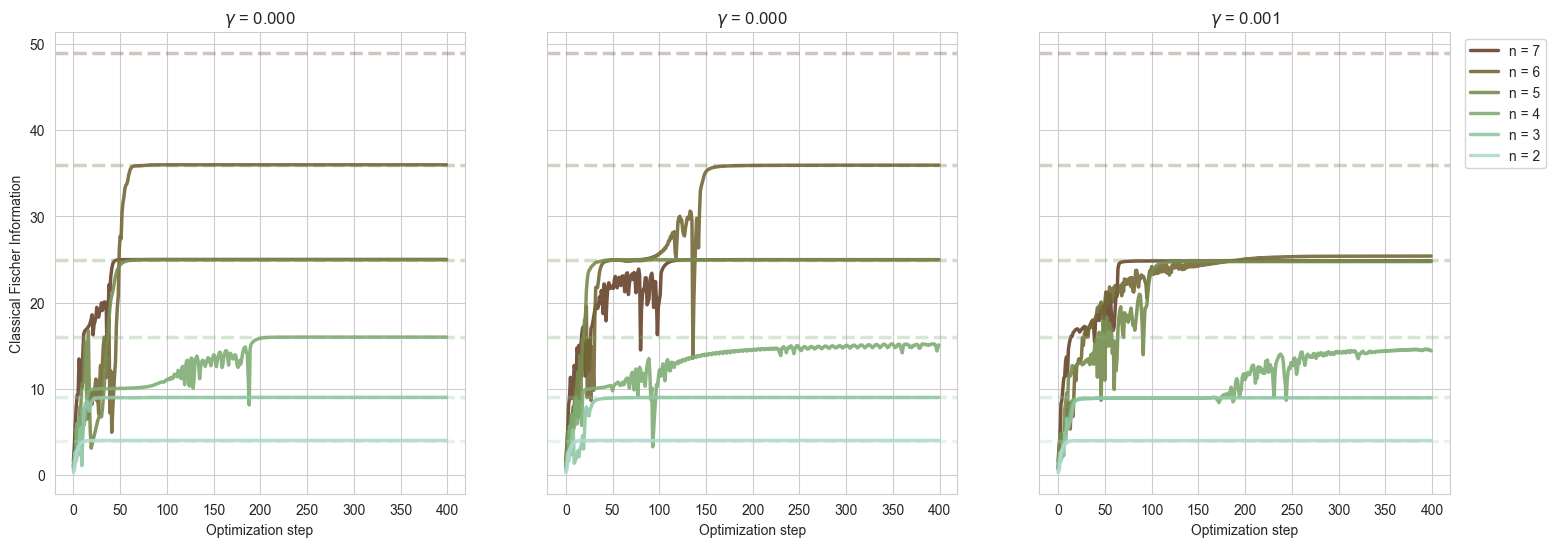

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[18, 6], sharey=True)
colors = sns.cubehelix_palette(start=0.5, rot=0.75, dark=0.2, light=.8, as_cmap=True)
norm = lambda x: (x - np.min(ns))/(np.max(ns) - np.min(ns))

gammas = sorted(df["gamma"].unique())
k = 3
for ax, i in zip(axs, (0, 3, 6)):
    gamma = gammas[i]
    for n in reversed(ns[:-1]):
        ax.axhline(n**2, color=colors(norm(n)), ls='--', alpha=0.3)

        df = data[n][k]
        row = df[df["gamma"] == gamma]

        row = row.loc[row["fi"].idxmax()]

        ax.plot(row.loss, color=colors(norm(n)), alpha=0.9, label=f"n = {n}")

    ax.set(xlabel="Optimization step", title=f"$\gamma$ = {gamma:0.3f}")
    if ax == axs[0]:
        ax.set(ylabel="Classical Fischer Information")
    if ax == axs[-1]:
        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), ncol=1)

plt.show()

### How does a fixed circuit change when noise is added after each layer?

405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
405
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
99
99
99
99
99
99
99
99
99
99
99
108
108
108
108
108
108
108
108
108
108
108
153
153
153
153
153
153
153
153
153
153
153


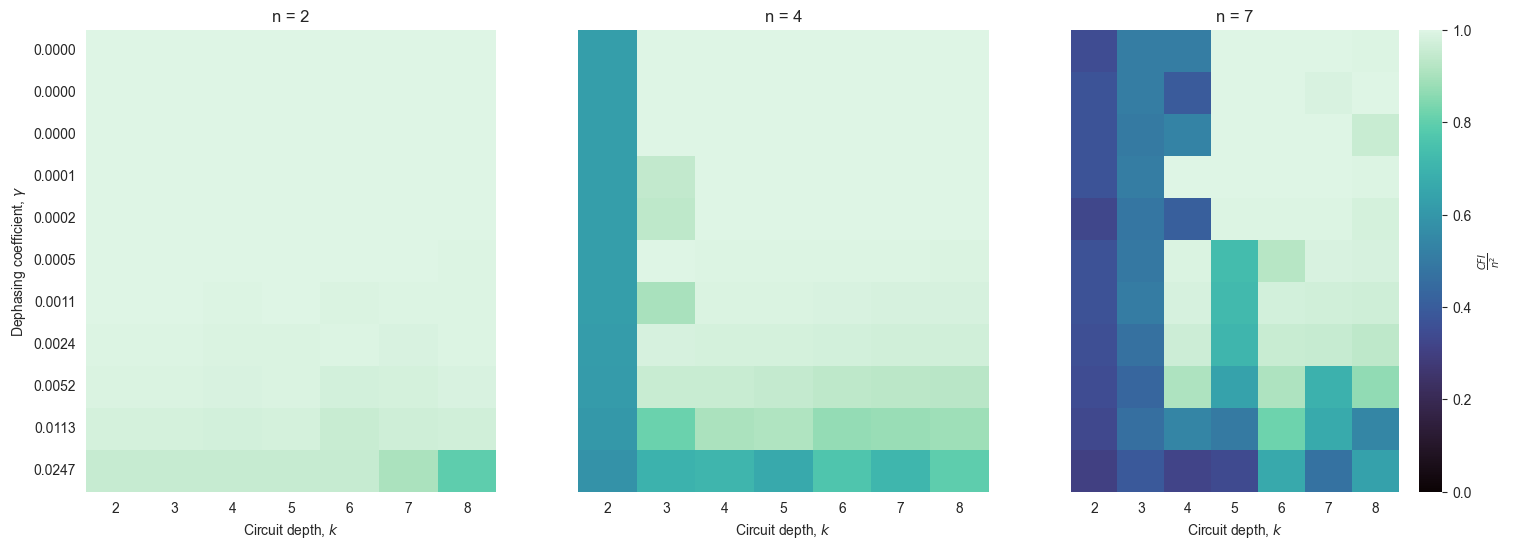

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[18, 6], sharey=True)

gammas = sorted(df["gamma"].unique())
ks = [2, 3, 4, 5, 6, 7, 8]

for ax, n in zip(axs, (2, 4, 7)):
    mat = np.zeros([len(ks), len(gammas)])
    for i, k in enumerate(reversed(ks)):
        for j, gamma in enumerate(gammas):

            df = data[n][k]
            print(df.size)
            row = df[df["gamma"] == gamma]
            row = row.loc[row["fi"].idxmax()]

            mat[i, j] = row["fi"]

    mat = np.flipud(mat)

    yticks = [f"{gamma:0.4f}" for gamma in gammas]
    sns.heatmap(mat.T / n**2, xticklabels=ks, yticklabels=yticks, ax=ax, vmax=1.0, vmin=0.0,
                cmap="mako", cbar_kws={"label": r"$\frac{CFI}{n^2}$"}, cbar=True if ax==axs[-1] else False)
    ax.set(xlabel="Circuit depth, $k$", title=f"n = {n}")
    if ax == axs[0]:
        ax.set(ylabel="Dephasing coefficient, $\gamma$", )
        ax.set_yticks(ticks=list(range(len(yticks))), ticklabels=np.log10(gammas), rotation=45)
        # plt.yticks(rotation=0)
plt.show()